# Project: No Show Appointments

## Introduction

#### The structure of the dataset

There are a little more than 110k appointments information which are divided into 14 columns. These columns provide data about the patient, their issues and whether or not they attended their appointment.

#### What are the main features of interest in the dataset

I am mostly interested in finding out the reasons of why a patient might miss their appointment and which factors inluence those events.

<a id='wrangling'></a>
## Data Wrangling

### Gather

In [411]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

In [412]:
# Load the dataset
appointments = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

### Assess and note issues

In [413]:
appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [414]:
appointments.shape

(110527, 14)

In [415]:
appointments.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [416]:
appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [417]:
appointments.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [418]:
appointments.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [419]:
appointments.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [420]:
appointments.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [421]:
appointments.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Issues
- uppercase column names
- incorrectly spelled column names (Hipertension, Handcap)
- patientid, appointmentid, AppoinmentDay, ScheduledDay, no-show are not consistent with SMS_recieved
- incorrect patient id dtype
- scheduleday and appointmentday columns are strings
- incorrect gender dtype
- confusing values for No-show column
- other numbers are given for True (1) or False (0) for Handicap column - 2, 3, 4
- negative number (-1) for age
- surprising Appointment days. There seems to be only 27 unique dates for appointments. This issue will be addressed after turning schedule and appointment columns to datetime

### Data Cleaning

In [422]:
# Make a copy of the dataset
copy = appointments.copy()

#### Uppercase column namese

In [423]:
# Turn all column names to lowercase
appointments.columns = appointments.columns.str.lower()
# Test
appointments.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Incorrectly spelled column names (Hipertension, Handcap)

In [424]:
# Rename the above columns
appointments.rename(columns={'hipertension': 'hypertension',
                             'handcap': 'handicap'}, inplace=True)
# Test
appointments.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no-show'],
      dtype='object')

#### Patientid, appointmentid, AppoinmentDay, ScheduledDay, no-show are not consistent with SMS_recieved

In [425]:
# Rename the above columns
appointments.rename(columns={'appointmentday': 'appointment_day',
 'scheduledday': 'scheduled_day', 'patientid': 'patient_id',
    'appointmentid': 'appointment_id', 'no-show': 'no_show'}, inplace=True)
# Test
appointments.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show'],
      dtype='object')

#### Incorrect patient id dtype

In [426]:
# Set the datatype of patient id to int
# I used string manipulation to convert patient ids from scientific notation to
# string, then got rid of all decimals. If works correctly, it still should 
# us the same number of unique patient ids
appointments.patient_id = appointments.patient_id.astype(str).str.strip('.0').str.replace('.', '').astype(dtype=np.int64)

# Test
appointments.patient_id.dtype, appointments.patient_id.nunique()

(dtype('int64'), 62299)

#### Scheduled_day and appointment_day columns are strings

In [427]:
# Convert columns to datetime
appointments['scheduled_day'] = pd.to_datetime(appointments['scheduled_day'])
appointments['appointment_day'] = pd.to_datetime(appointments['appointment_day'])

# Test
appointments.dtypes

patient_id                       int64
appointment_id                   int64
gender                          object
scheduled_day      datetime64[ns, UTC]
appointment_day    datetime64[ns, UTC]
age                              int64
neighbourhood                   object
scholarship                      int64
hypertension                     int64
diabetes                         int64
alcoholism                       int64
handicap                         int64
sms_received                     int64
no_show                         object
dtype: object

#### Incorrect gender dtype

In [428]:
# Convert gender column to categorical dtype
appointments.gender = appointments.gender.astype(dtype='category')

# Test
appointments.gender.dtype

CategoricalDtype(categories=['F', 'M'], ordered=False)

#### String values for no_show column

In [429]:
# First, this column uses yes or no in a confusing manner. Let's fix that
# Also, change the column name to a more intuitive one
appointments.no_show = appointments.no_show.apply(
                                lambda x: "Yes" if x == 'No' else 'No')

appointments.rename(columns={'no_show': 'attended'}, inplace=True)

# Now, convert them to 0s and 1s
appointments.attended = appointments.attended.apply(
                       lambda x: 1 if x == 'Yes' else 0)

# Test
appointments.attended.value_counts()

1    88208
0    22319
Name: attended, dtype: int64

#### Other numbers are given for True (1) or False (0) for Handicap column - 2, 3, 4

In [430]:
# Replace all the values with ones if not 0
appointments.handicap = appointments.handicap.apply(
            lambda x: 1 if x != 0 else x).astype(dtype=np.int64)

# Test
appointments.handicap.value_counts()

0    108286
1      2241
Name: handicap, dtype: int64

#### Negative number (-1) for age

In [431]:
# Drop the row with negative age
negative_index = appointments[appointments.age == -1].index
appointments.drop(negative_index, inplace=True)

# Test
appointments.age.value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: age, Length: 103, dtype: int64

#### Surprising appointment days. There seems to be only 27 unique dates for appointments. This issue will be addressed after converting schedule and appointment columns to datetime

In [432]:
(appointments.appointment_day - appointments.scheduled_day).astype(str).str.contains('-').sum()

38567

There seems to be almost 39k appointment records which had schedule day later than appointment day which does not make sense (patients should first schedule, then come to appointments). Therefore, I am going look at all of the records with appointment day happening before schedule day.

In [433]:
appointments[appointments.appointment_day < appointments.scheduled_day]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,attended
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110511,823599626588,5786742,F,2016-06-08 08:50:20+00:00,2016-06-08 00:00:00+00:00,14,MARIA ORTIZ,0,0,0,0,0,0,1
110512,98762456447375,5786368,F,2016-06-08 08:20:01+00:00,2016-06-08 00:00:00+00:00,41,MARIA ORTIZ,0,0,0,0,0,0,1
110513,86747784995281,5785964,M,2016-06-08 07:52:55+00:00,2016-06-08 00:00:00+00:00,2,ANTÔNIO HONÓRIO,0,0,0,0,0,0,1
110514,2695685177138,5786567,F,2016-06-08 08:35:31+00:00,2016-06-08 00:00:00+00:00,58,MARIA ORTIZ,0,0,0,0,0,0,1


As can be seen from above, there were patients who attended their appointments but had their appointments earlier than their schedule day. So, we can only assume that it was just some mistaking when collecting the data, but we have to make sure. Before dropping these records, just to be safe, I am going to leave out the records which had -1 day difference, because that could mean the appointment might have happened on the schedule day (even though there is a negative hour difference)

In [434]:
appointments['difference'] = appointments.appointment_day - appointments.scheduled_day

In [435]:
problematic_appoints = appointments[appointments.difference < datetime.timedelta(days=-1)]
problematic_appoints

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,attended,difference
27033,7839272661752,5679978,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,0,-2 days +13:08:07
55226,7896293967868,5715660,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,0,-2 days +09:09:19
64175,24252258389979,5664962,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,0,-2 days +10:16:02
71533,998231581612122,5686628,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,0,-7 days +10:10:40
72362,3787481966821,5655637,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,0,-2 days +17:09:03


Now we have 4 patients which has the same issue as above but also, did not attend their appointment. I drop those:

In [436]:
appointments.drop(problematic_appoints.index, inplace=True)

# Test
appointments.shape

(110521, 15)

In [437]:
# Drop the difference column since we do not need it anymore
appointments.drop('difference', axis=1, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

### Univariate exploration

First, I am going to look at the distribution of age

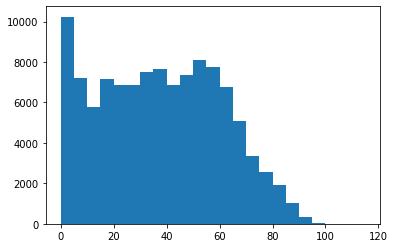

In [438]:
bins = np.arange(0, appointments.age.max() + 5, 5)
plt.hist(data=appointments, x='age', bins=bins);

From the above histogram, it is clear that most patients fall between 0-60 ages. To get more information, I am going put ages into age groups.

In [439]:
def group_age(age):
    """Groups the ages into 4 different groups:
    Children, Teenagers, Yound Adults, Middle Age Adults, Elderly, over 90"""
    if 0 <= age < 12:
        return 'children'
    elif 12 <= age < 19:
        return 'teenagers'
    elif 19 <= age < 35:
        return 'young adults'
    elif 35 <= age < 60:
        return 'middle age adults'
    elif 60 <= age < 90:
        return 'elderly'
    else:
        return 'over 90'

In [440]:
appointments['age_groups'] = appointments.age.apply(group_age)
appointments.sample(10)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,attended,age_groups
83874,2559591465657,5693441,F,2016-05-13 07:15:56+00:00,2016-05-13 00:00:00+00:00,32,SÃO CRISTÓVÃO,0,0,0,0,0,0,1,young adults
101534,5623553193854,5770235,F,2016-06-03 09:56:52+00:00,2016-06-03 00:00:00+00:00,55,SÃO BENEDITO,0,0,0,0,0,0,1,middle age adults
52428,7796319285658,5735422,F,2016-05-25 07:07:40+00:00,2016-05-31 00:00:00+00:00,32,SANTO ANTÔNIO,0,0,0,0,0,1,0,young adults
80313,15827682276434,5736360,M,2016-05-25 08:14:28+00:00,2016-05-25 00:00:00+00:00,1,PIEDADE,0,0,0,0,0,0,1,children
66238,36845689139163,5619281,F,2016-04-26 07:51:36+00:00,2016-05-18 00:00:00+00:00,3,JARDIM CAMBURI,0,0,0,0,0,0,1,children
27339,153522341971323,5725466,F,2016-05-20 11:10:12+00:00,2016-05-31 00:00:00+00:00,29,PRAIA DO SUÁ,0,0,0,0,0,1,0,young adults
50620,92944397258896,5582803,M,2016-04-14 09:56:39+00:00,2016-05-09 00:00:00+00:00,67,MARUÍPE,0,1,1,0,0,0,1,elderly
78302,84565492649492,5716204,M,2016-05-18 16:08:44+00:00,2016-05-19 00:00:00+00:00,7,INHANGUETÁ,0,0,0,0,0,0,1,children
86879,93822392944,5773004,F,2016-06-03 17:59:18+00:00,2016-06-08 00:00:00+00:00,47,SANTOS DUMONT,0,0,0,0,0,1,1,middle age adults
109202,27957588762948,5706638,F,2016-05-17 08:36:54+00:00,2016-06-06 00:00:00+00:00,22,TABUAZEIRO,0,0,0,0,0,1,1,young adults


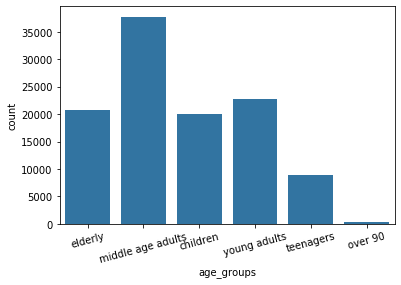

In [444]:
# Now let's look at the distribution of age again
base_color = sb.color_palette()[0]
sb.countplot(data=appointments, x='age_groups', color=base_color)
plt.xticks(rotation=15);

It is clear from above that middle aged adults represent the majority of patients, while there are very few people over 90s

Now, let's look at the distribution of different issues. In order to do this effectively, I will create a custom function which groups patients' issues

In [445]:
def group_issues(df):
    """Assigns an issue label for every patient who had an appointment.
       If no or multiple issues, the function returns "none" or 
       "multiple" accordingly
    """
    # Create a new column for the new variable
    df['issue'] = (df.hypertension + df.diabetes + df.alcoholism + df.handicap).astype(np.int64)
    
#     # Convert 1s to the actual issue name
#     df.hypertension = df.hypertension.apply(lambda x: 'hypertension' if x == 1 else x)
#     df.diabetes = df.diabetes.apply(lambda x: 'diabetes' if x == 1 else x)
#     df.alcoholism = df.alcoholism.apply(lambda x: 'alcoholism' if x == 1 else x)
#     df.handicap = df.handicap.apply(lambda x: 'handicap' if x == 1 else x)

    # Convert 0s to 'none' and values greater than 1 to 'multiple'
    df.issue = df.issue.apply(lambda x: 'none' if x == 0 else 'multiple' if x > 1 else x)

    # Convert the remaining records (patiens with only one issue) 
    # to issue name
    for i in range(df.shape[0]):
        if df.iloc[i].issue == 1 and df.iloc[i].hypertension == 1:
            df.iloc[i].issue = 'hypertension'
        elif df.iloc[i].issue == 1 and df.iloc[i].diabetes == 1:
            df.iloc[i].issue = 'diabetes'
        elif df.iloc[i].issue == 1 and df.iloc[i].alcoholism == 1:
            df.iloc[i].issue = 'alcoholism'
        elif df.iloc[i].issue == 1 and df.iloc[i].handicap == 1:
            df.iloc[i].issue = 'handicap'

In [446]:
# Run the above function on the dataframe to get issue groups
group_issues(appointments)

C:\Users\advpro\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [448]:
appointments.sample(15)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,attended,age_groups,issue
56031,71338247487512,5666766,F,2016-05-06 07:04:37+00:00,2016-05-10 00:00:00+00:00,31,SÃO JOSÉ,0,0,0,0,0,1,1,young adults,none
57142,26397694795497,5555848,M,2016-04-07 10:46:50+00:00,2016-05-12 00:00:00+00:00,64,MARIA ORTIZ,0,0,0,0,0,1,1,elderly,none
39093,9358182317698,5655138,F,2016-05-03 16:05:44+00:00,2016-05-05 00:00:00+00:00,68,BONFIM,0,1,0,0,0,0,0,elderly,1
82714,449979456299227,5745930,M,2016-05-30 13:07:35+00:00,2016-05-30 00:00:00+00:00,2,NOVA PALESTINA,0,0,0,0,0,0,1,children,none
66815,194976613561,5680567,M,2016-05-10 12:12:22+00:00,2016-05-10 00:00:00+00:00,30,JARDIM CAMBURI,0,0,0,0,0,0,1,young adults,none
38529,66344273256127,5558648,F,2016-04-07 17:50:37+00:00,2016-05-09 00:00:00+00:00,7,MARIA ORTIZ,0,0,0,0,0,0,1,children,none
54870,6897743937448,5693628,F,2016-05-13 07:30:28+00:00,2016-05-13 00:00:00+00:00,7,CONQUISTA,0,0,0,0,0,0,1,children,none
5027,465689145614417,5702471,M,2016-05-16 12:25:09+00:00,2016-05-19 00:00:00+00:00,77,JARDIM DA PENHA,0,1,0,0,0,0,1,elderly,1
23410,46445315475739,5668014,F,2016-05-06 08:22:49+00:00,2016-05-13 00:00:00+00:00,51,HORTO,0,1,0,0,0,0,1,middle age adults,1
8500,8435223536,5714348,M,2016-05-18 11:46:38+00:00,2016-05-18 00:00:00+00:00,52,INHANGUETÁ,0,0,0,1,0,0,1,middle age adults,1


### Research Question 2  (Replace this header name!)

In [ ]:
# Rename the above columns

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!